In [675]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def relu(Z):
    A = np.maximum(0,Z)
    
    return A

def sigmoid_derev(dA,Z):
    s = sigmoid(Z)
    return dA *s * (1-s)
def relu_derev(dA,Z):
    dZ = np.array(dA, copy=True)  
    dZ[Z <= 0] = 0       
    return dZ

In [676]:
def initializeWeights_deep_neural(dims): # dims [n_units , n_hidden_unit , n_hidden_layers]
    np.random.seed(1)
    parameters = {}
    
    for l in range(1,len(dims)):

        parameters['W' + str(l)] = np.random.randn(dims[l], dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((dims[l], 1))

    return parameters

    
def forward_propgation(X,Y,parameters):
    L = len(parameters) // 2
    A = X
    As = []
    Zs = []
    for l in range(1,L):
        if True:
            A_prev = A
            Z=parameters['W' + str(l)] @ A_prev + parameters['b' + str(l)]
            A = relu(Z)
            As.append(A)
            Zs.append(Z)
    Z = parameters['W' + str(L)] @ A + parameters['b' + str(L)]
    AL = sigmoid(Z)
    As.append(AL)
    Zs.append(Z)
    m = Y.shape[1]
    acc = (Y == AL) / len(Y)
    cost = (-1/m) * np.sum((Y*np.log(AL) + (1-Y) * np.log(1-AL)))
    cost = float(np.squeeze(cost))  
    
    return As,Zs,cost

def predict(X,parameters):
    L = len(parameters) // 2
    A = X
    for l in range(1,L):
        if True:
            A_prev = A
            Z=parameters['W' + str(l)] @ A_prev + parameters['b' + str(l)]
            A = relu(Z)
    Z = parameters['W' + str(L)] @ A + parameters['b' + str(L)]
    AL = sigmoid(Z)
    yhat = []
    for i in range(AL.shape[1]):
        if AL[0,i] > 0.5:
            yhat.append(1)
        else:
            yhat.append(0)
    return np.array(yhat)
    
    
def back_propgation(X,Y,parameters):
    grads = {}
    L = len(parameters) // 2
    m = Y.shape[1]
    As,Zs,cost = forward_propgation(X,Y,parameters)
    Y = Y.reshape(As[-1].shape)
    
    # Computing first derivative starting from the last layer
    
    dAL = - (np.divide(Y, As[-1]) - np.divide(1 - Y, 1 - As[-1]))
    
    dZ = sigmoid_derev(dAL,Zs[-1])
    grads["dW"+str(L-1)] = (1/m) * dZ@As[-2].T
    grads["db"+str(L-1)]= (1/m) * np.sum(dZ,axis=1,keepdims=True)
    grads["dA"+str(L-1)] = parameters["W"+str(L)].T@dZ
    dA_prev_temp = parameters["W"+str(L)].T@dZ
    for i in reversed(range(L-1)):

        dZ = relu_derev(dA_prev_temp,Zs[i])
        dA_prev_temp = parameters["W"+str(i+1)].T@dZ
        dW_temp = (1/m) * dZ@As[i-1].T
        db_temp =  (1/m) * np.sum(dZ,axis=1,keepdims=True)
          
        grads["dA" + str(i)] = dA_prev_temp
        grads["dW" + str(i)] = dW_temp
        grads["db" + str(i)] = db_temp
        
        
    return grads,cost



def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l)]
        
    return parameters


In [677]:
def deep_NN_model(X,Y,dims,step_size,num_iterations):
    parameters = initializeWeights_deep_neural(dims)
    t_cost = []
    for i in range(num_iterations):
        grads,cost = back_propgation(X,Y,parameters)
        t_cost.append(cost)
        parameters = update_parameters(parameters,grads,step_size)

    return parameters,t_cost

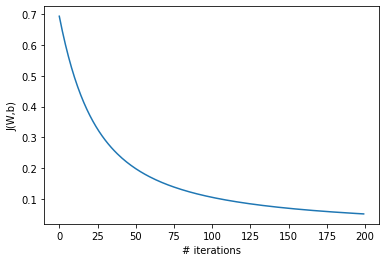

In [678]:
from sklearn.datasets import load_iris
dict =  load_iris()
x = dict['data']
Y = dict['target'].reshape(-1,1)

#Trying model on deep deep NN with 2-layers with 5,20 hidden units respectively

parameters,cost= deep_NN_model(x[:,1].reshape(-1,1).T,Y.T,[1,5,20,1],0.1,200)

#plotting cost as function of iterations

num_iters = np.arange(0,200)
_=plt.plot(num_iters,cost)
_=plt.xlabel('# iterations')
_=plt.ylabel('J(W,b)')